## Regresión Lineal

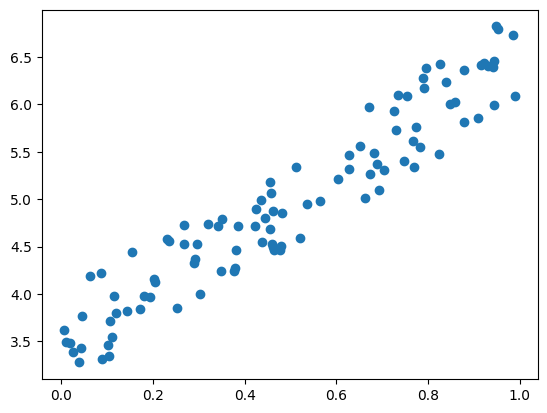

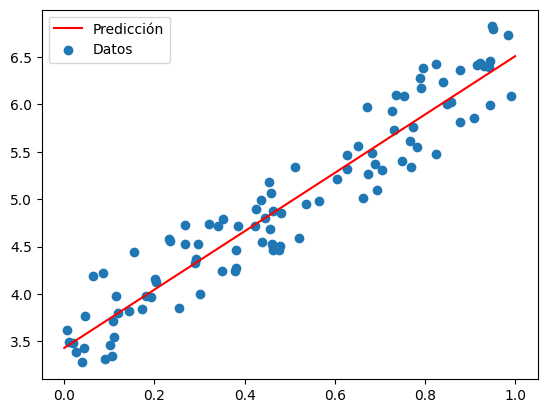

In [ ]:
# usamos las librerías que son necesarias para el ejercicio
import numpy as np
import matplotlib.pyplot as plt

# se usan datos randomicos para este caso
x = np.random.rand(100, 1)
y = 3 + 3 * x + np.random.rand(100, 1)
# se grafican los puntos
plt.scatter(x, y)
plt.show()

# se establecen los datos de entrada y salida respectivamente  (X,Y)
x_b = np.c_[np.ones((100, 1)), x]
x_b
param = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
param
x_nuevo = np.array([[0], [1]])
x_nuevo
x_nuevo_b = np.c_[np.ones((2, 1)), x_nuevo]
y_pred = x_nuevo_b.dot(param)
y_pred

plt.plot(x_nuevo, y_pred, "r-", label="Predicción")
plt.scatter(x, y, label="Datos")
plt.legend()
plt.show()

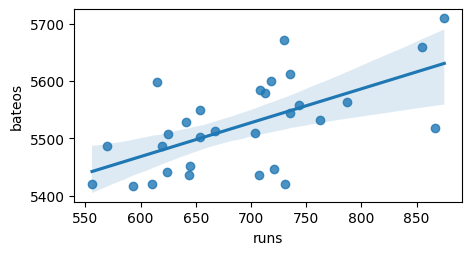

In [ ]:
#versión gráfica de una regresión lineal

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'bateos': bateos, 'runs': runs})

fig, ax = plt.subplots(figsize=(5, 2.5))
sns.regplot(x='runs', y='bateos', data=datos, ax = ax)

Coeficiente de correlación de Pearson: 0.6106270467206688
P-value: 0.0003388351359791975
Intercept: -2367.702841302211
Coeficiente: [('bateos', np.float64(0.5528713534479736))]
Coeficiente de determinación R^2: 0.3586119899498744
Primeras cinco predicciones: [643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]
El error (rmse) de test es: 59.336716083360486


<Axes: xlabel='runs', ylabel='bateos'>

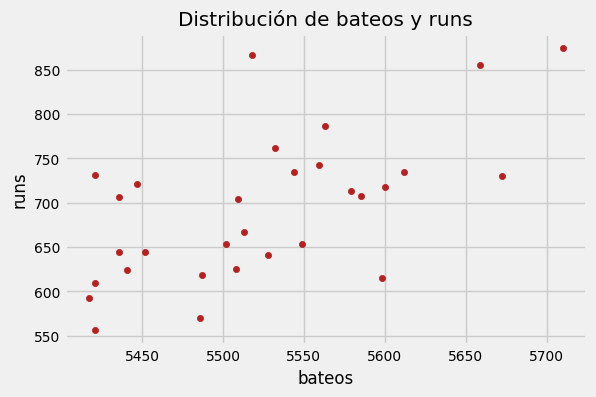

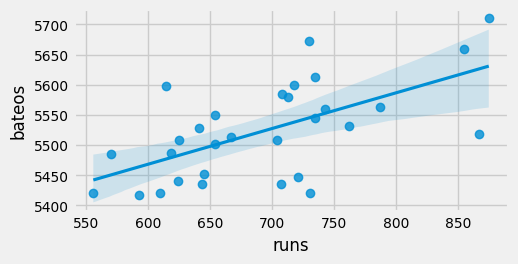

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

# Configuración matplotlib
# ==============================================================================
plt.style.use("fivethirtyeight")
plt.rcParams.update({"font.size": 10, "lines.linewidth": 1.5})

# Configuración warnings
# ==============================================================================
import warnings

warnings.filterwarnings("once")

# Datos
# ==============================================================================
equipos = [
    "Texas",
    "Boston",
    "Detroit",
    "Kansas",
    "St.",
    "New_S.",
    "New_Y.",
    "Milwaukee",
    "Colorado",
    "Houston",
    "Baltimore",
    "Los_An.",
    "Chicago",
    "Cincinnati",
    "Los_P.",
    "Philadelphia",
    "Chicago",
    "Cleveland",
    "Arizona",
    "Toronto",
    "Minnesota",
    "Florida",
    "Pittsburgh",
    "Oakland",
    "Tampa",
    "Atlanta",
    "Washington",
    "San.F",
    "San.I",
    "Seattle",
]

bateos = [
    5659,
    5710,
    5563,
    5672,
    5532,
    5600,
    5518,
    5447,
    5544,
    5598,
    5585,
    5436,
    5549,
    5612,
    5513,
    5579,
    5502,
    5509,
    5421,
    5559,
    5487,
    5508,
    5421,
    5452,
    5436,
    5528,
    5441,
    5486,
    5417,
    5421,
]

runs = [
    855,
    875,
    787,
    730,
    762,
    718,
    867,
    721,
    735,
    615,
    708,
    644,
    654,
    735,
    667,
    713,
    654,
    704,
    731,
    743,
    619,
    625,
    610,
    645,
    707,
    641,
    624,
    570,
    593,
    556,
]

datos = pd.DataFrame({"equipos": equipos, "bateos": bateos, "runs": runs})
datos.head(10)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(x="bateos", y="runs", c="firebrick", kind="scatter", ax=ax)
ax.set_title("Distribución de bateos y runs")
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x=datos["bateos"], y=datos["runs"])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

# División de los datos en train y test
# ==============================================================================
X = datos[["bateos"]]
y = datos["runs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234, shuffle=True
)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X=X_train, y=y_train)

# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo.intercept_}")
print(f"Coeficiente: {list(zip(modelo.feature_names_in_, modelo.coef_))}")
print("Coeficiente de determinación R^2:", modelo.score(X, y))

# hasta acá está entrenado el modelo con el 80% de los datos
# ================================================================================

# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

fig, ax = plt.subplots(figsize=(5, 2.5))
sns.regplot(x="runs", y="bateos", data=datos, ax=ax)

## Regresión lineal y polimonial

Index(['Temperatura', 'Price', 'VentaHelados'], dtype='object')
Index(['Temperatura', 'Price', 'VentaHelados'], dtype='object')

Resultados del modelo:
Grado del polinomio: 2

Coeficientes: [13.21503105 -3.12864894 -0.05590055 -0.36959755 -4.14755623]
Intercepto: 266.419271719774

Métricas en entrenamiento:
MSE: 9867.0419
R²: 0.4089

Métricas en prueba:
MSE: 8312.6427
R²: 0.4704


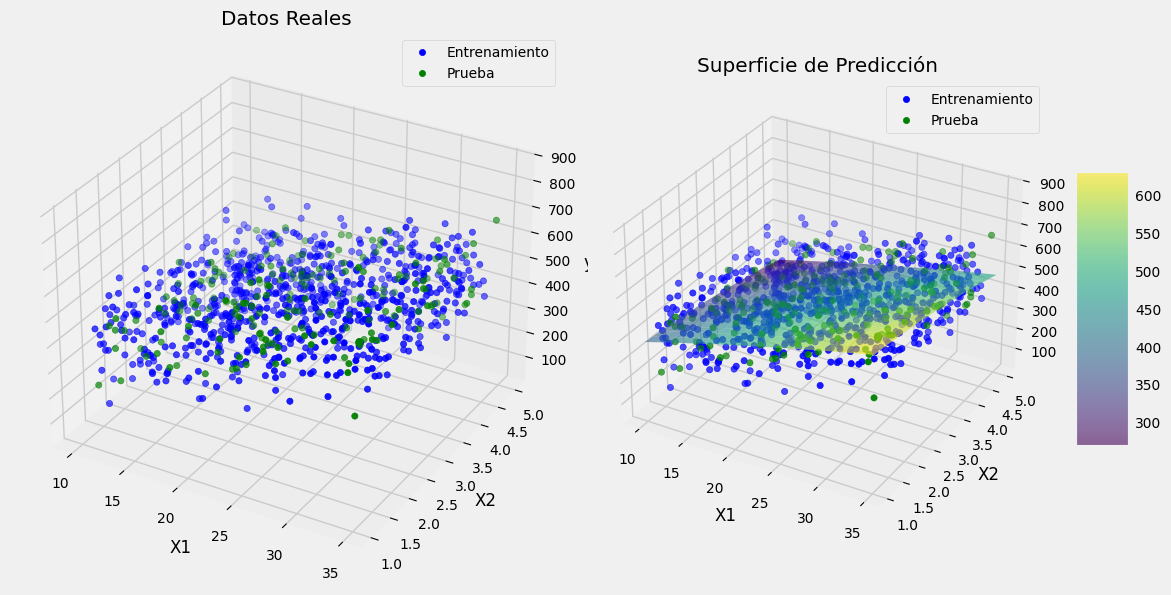

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# 1. Cargar datos desde archivo
# Asumiendo un archivo CSV con columnas: X1, X2, y
datos = pd.read_excel('../resources/VH.xlsx')  # Cambia por tu archivo
print(datos.columns)

# Print the actual column names to identify the correct ones
print(datos.columns)

# Access columns using actual names
# Example: if the column names are 'Temperature' and 'Price' without semicolons
X = datos[['Temperatura', 'Price']].values  # Dos variables de entrada
y = datos['VentaHelados'].values

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Configurar transformación polinomial
grado_polinomio = 2  # Puedes ajustar este valor
poly = PolynomialFeatures(degree=grado_polinomio, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 4. Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

# 5. Evaluar el modelo
y_train_pred = modelo.predict(X_train_poly)
y_test_pred = modelo.predict(X_test_poly)

print("\nResultados del modelo:")
print(f"Grado del polinomio: {grado_polinomio}")
print("\nCoeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("\nMétricas en entrenamiento:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}")
print("\nMétricas en prueba:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

# 6. Visualización 3D
fig = plt.figure(figsize=(12, 6))

# Gráfico de los datos reales
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, c='blue', label='Entrenamiento')
ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, c='green', label='Prueba')
ax1.set_title('Datos Reales')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.legend()

# Gráfico de la superficie de predicción
ax2 = fig.add_subplot(122, projection='3d')

# Crear malla para la superficie
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Predecir para todos los puntos de la malla
X_mesh = np.c_[X1_mesh.ravel(), X2_mesh.ravel()]
X_mesh_poly = poly.transform(X_mesh)
y_mesh = modelo.predict(X_mesh_poly).reshape(X1_mesh.shape)

# Graficar superficie
surf = ax2.plot_surface(X1_mesh, X2_mesh, y_mesh, cmap='viridis', alpha=0.6)
ax2.scatter(X_train[:, 0], X_train[:, 1], y_train, c='blue', label='Entrenamiento')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test, c='green', label='Prueba')
ax2.set_title('Superficie de Predicción')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('y')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)
ax2.legend()

plt.tight_layout()
plt.show()

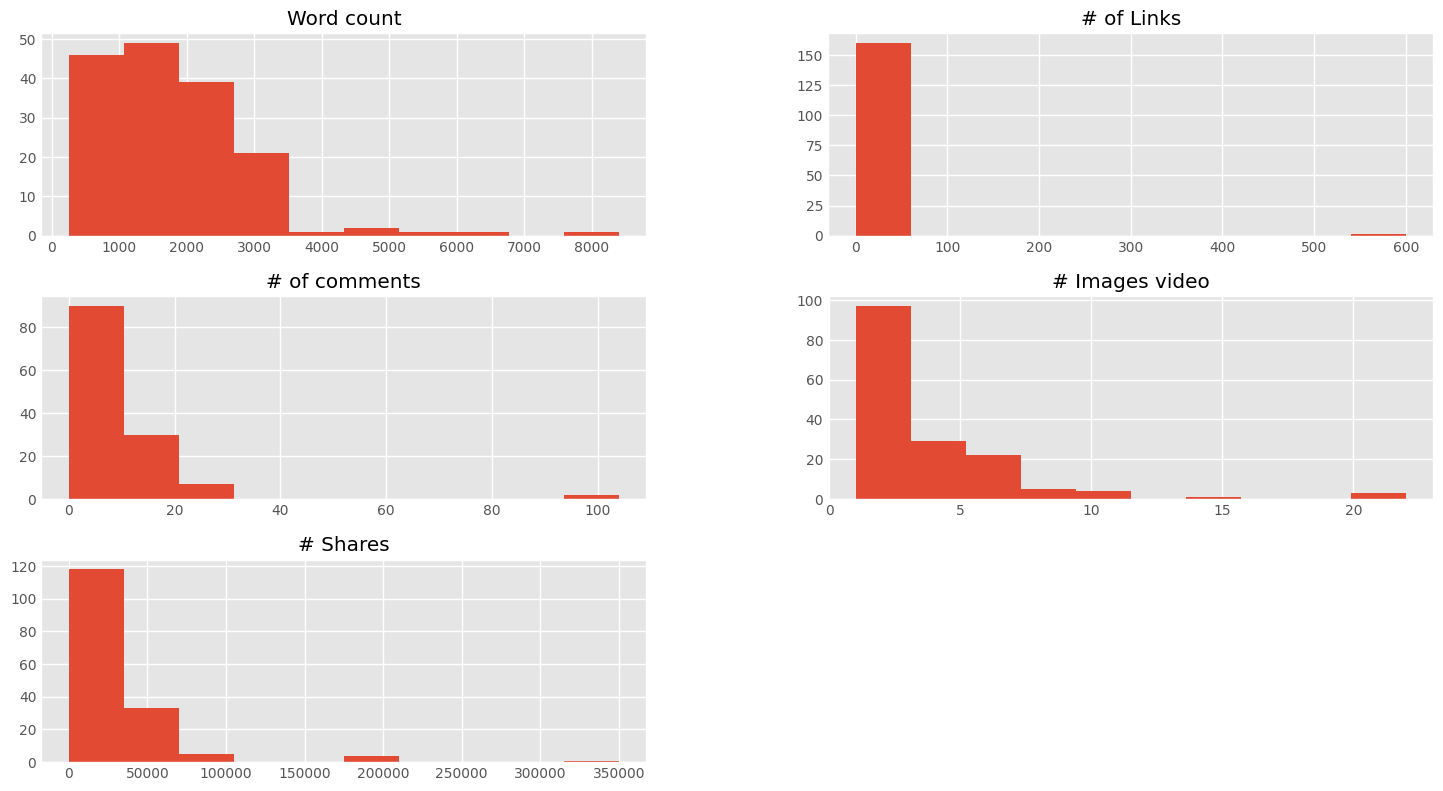

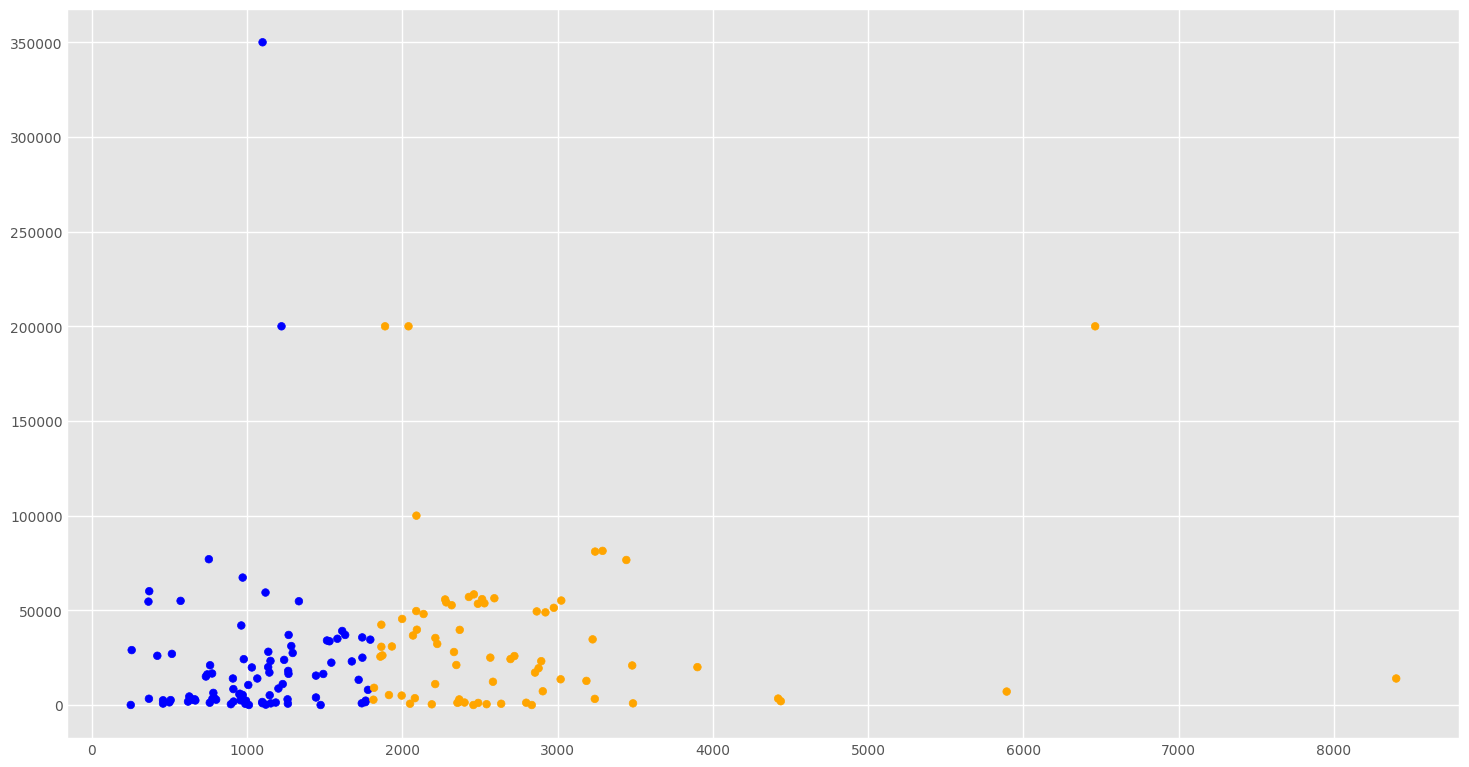

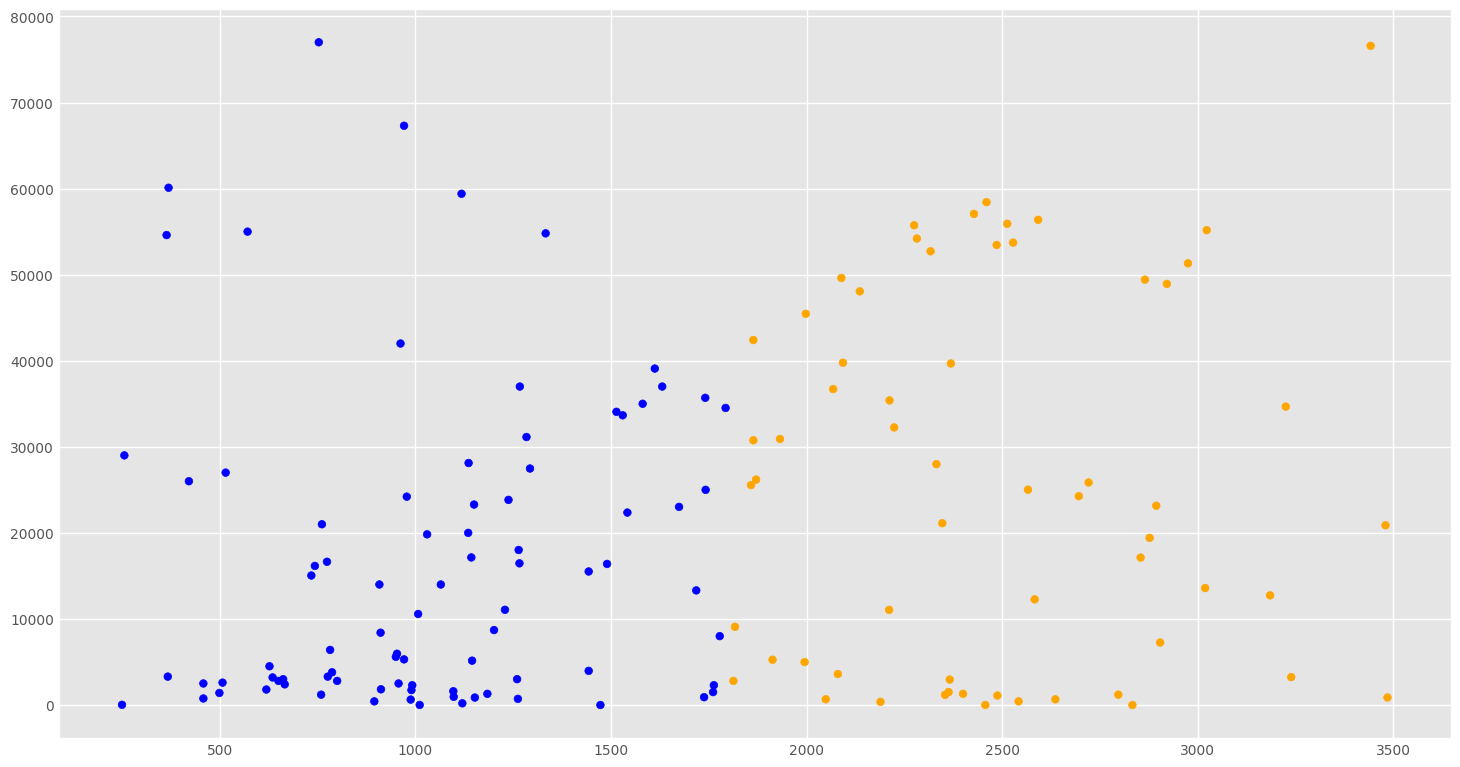

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


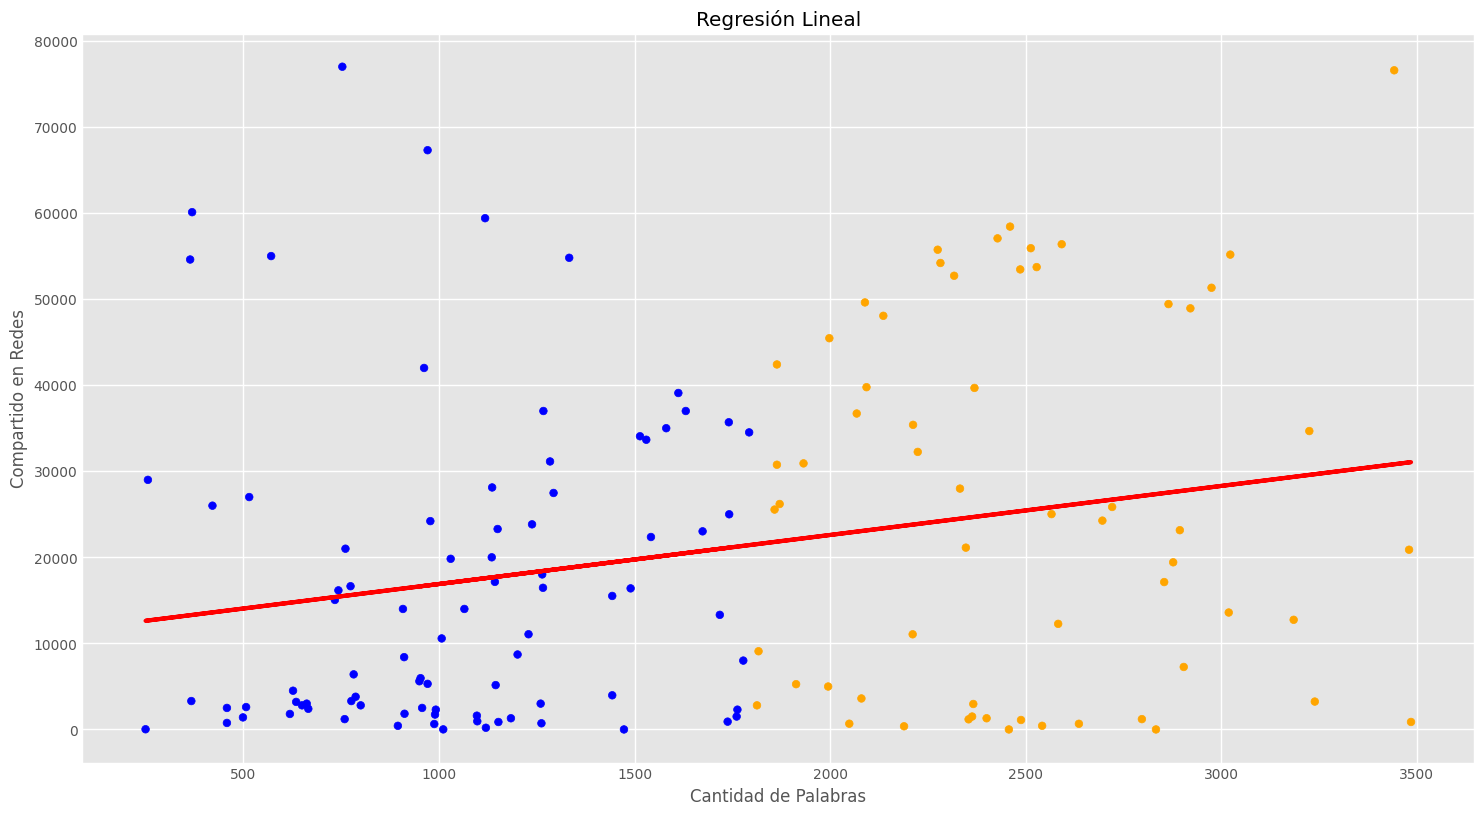

In [7]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#cargamos los datos de entrada
data = pd.read_csv("../resources/articulos_ml.csv")

#veamos cuantas dimensiones y registros contiene
data.shape

#son 161 registros con 8 columnas. Veamos los primeros registros para tener una idea
data.head()

# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'], axis=1).hist()
plt.show()

#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()